## なぜ入試数学をPythonで？？
Pythonについていろいろ調べているうちに、なんとプログラミングで数学の問題が解ける！ということを知りました。

コードの勉強にもなると思い、じゃあやってみよう！ということで、今回の記事に至りました。

## どの問題を解くか？
いろいろなサイトでPythonで入試数学を解く記事は見つかります。京大、東大、センター数学などなど。

ですが、阪大数学を扱っているものはありませんでした。ならば、せっかくなので阪大数学を解こう！ということになりました。これには、自分の受けた試験を再び解く、というのもなんとなく感慨深かったことも理由としてあります。

※なお、プログラミングで解くことを重視し、本来の数学的な厳密な議論は飛ばしているため、「入試の解答」とはかけ離れたものになります。以上ご了承ください。

## 環境
- `Python3.6.1`
- `sympy`：sympyはPythonのライブラリの一つで、記号計算を行うものです。

各問題共通のコードとして、sympyをインポートしておきます。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
sy.init_printing() # Jupyter Notebook上で、レンダリングされた結果を表示する

## 大阪大学2018年 理系数学 第１問

![問](https://raw.githubusercontent.com/oumpy/hp_management/master/content/articles/2018sy/Tech_archive/images/handai_math_figs/1.png)

### (1)

#### <方針>
普通に解くなら、$y=$(真ん中)$-$(左)、$y=$(右)$-$(真ん中)、とおいて、  
微分 → 増減表 → グラフ → $x>0$で$y>0$  
という流れで示すのが一般的だと思いますが、`sympy`では、簡単にグラフが書けるので、一気にグラフを描いて示します。

In [2]:
x = sy.symbols('x')

変数`ｘ`を`symbols()`を用いて変数定義します

In [3]:
expr1 = x-x**2/2
expr2 = sy.log(1+x)
expr3 = x/sy.sqrt(1+x)

3式をそれぞれ`expr1,2,3`と名前を付けて宣言します。なお、`sy.log()`で自然対数 $\log$ を定義できます。
`sy.sqrt`は平方根です。

In [4]:
expr1

In [5]:
expr2

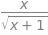

In [6]:
expr3

念のため、出力して確認。

In [7]:
expr4 = expr2 - expr1
expr4 

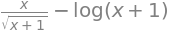

In [8]:
expr5 = expr3 - expr2
expr5

にて、(真ん中)ー(左)、(右)ー(真ん中)の関数を新たに設定。

以下ではグラフを描画する。なお、`from sympy.plotting import plot`が正常に描画をしなかったので、`numpy`と`matplotlib`を用いました。

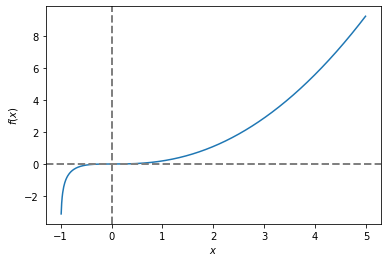

In [9]:
func_expr4 = sy.lambdify(x, expr4, "numpy") # numpyの関数に変換
x_expr4 = np.arange(-0.99, 5, 1e-2)
y_expr4 = func_expr4(x_expr4)

plt.plot(x_expr4, y_expr4)
plt.axvline(x=0, color="gray", linestyle="dashed", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="dashed", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

上のグラフから、$x>0$ のとき、`expr4`$>0$ すなわち、(真ん中)$-$(左)$>0$ が示せる。

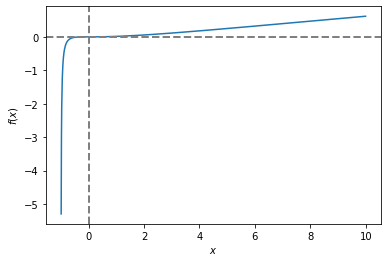

In [10]:
func_expr5 = sy.lambdify(x, expr5, "numpy") # numpyの関数に変換
x_expr5 = np.arange(-0.99, 10, 1e-2)
y_expr5 = func_expr5(x_expr5)

plt.plot(x_expr5, y_expr5)
plt.axvline(x=0, color="gray", linestyle="dashed", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="dashed", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

上のグラフから、$x>0$ のとき、`expr5`$>0$ すなわち、(右)$-$(真ん中)$>0$ が示せる。よって、(1) の上式は示される。

### (2)
#### ＜方針＞
これも普通に解くなら、(1)の誘導を利用して、はさみうちやら微分やらで解けますが、今回は最大値・最小値・極限＋グラフで求めます。

In [11]:
expr6 = 1/sy.log(1+x) 
expr7 = 1/x

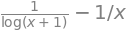

In [12]:
expr8 = expr6 - expr7
expr8

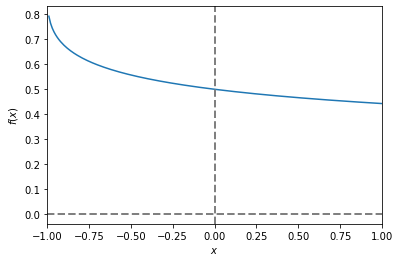

In [13]:
func_expr8 = sy.lambdify(x, expr8, "numpy") # numpyの関数に変換
x_expr8 = np.arange(-0.99, 1e4, 1e-2)
y_expr8 = func_expr8(x_expr8)

plt.plot(x_expr8, y_expr8)
plt.xlim(-1, 1)
plt.axvline(x=0, color="gray", linestyle="dashed", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="dashed", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

$-1<x<1$の狭い範囲では上図のようになり、

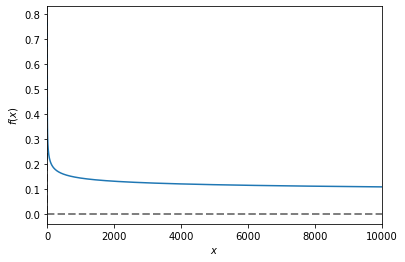

In [14]:
plt.plot(x_expr8, y_expr8)
plt.xlim(-1, 1e4)
plt.axvline(x=0, color="gray", linestyle="dashed", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="dashed", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

$1-<x<10^4$という広い範囲では、`expr8` は$x \to \infty$ のとき、`expr8`$\to 0$に収束すると予想できます。
0に収束することを以下で示していきます。

まず、最大値を求めます。

In [15]:
from scipy.optimize import differential_evolution

これは、関数の最小値を求めることができるアルゴリズムです。
なお、これはscipyで定義域を指定した大域最小化が行える唯一の方法だそうです。

In [16]:
numeric_expr8 = sy.lambdify(x , expr8)

`lambda`を使って `expr8` を、$x$ を変数（引数）とする無名関数に変換します。

In [17]:
minus_numeric_expr8 = lambda x: -numeric_expr8(x)

ここで`scipy.optimize`で求められるのは最小値、ということなので `expr8` の符号を反転させ、
最小値を求め、のちに最小値の符号を反転させ最大値とする、という方法で求めます。

In [18]:
differential_evolution(minus_numeric_expr8, [(0, 1e5)])

     fun: -0.4999962766596582
 message: 'Optimization terminated successfully.'
    nfev: 477
     nit: 28
 success: True
       x: array([4.46811027e-05])

という結果になります。

ここで、`fun`以下が求めたい最小値なので、`expr8` の最大値は$0.49980\cdots \approx 0.5=\frac{1}{2}$
となります。

次に、`expr8` の最小値として極限を求めます。
無限大まで飛ばします。

In [19]:
f1 = sy.limit(expr8/x, x, sy.oo)

極限式を`f1`と置きます。
極限は`sy.limit()`で求められます。

In [20]:
print(f1)

0


すると、無限大への極限は0となることがわかります。

以上より、$x>0$では$0<y<\frac{1}{2}$の範囲を取りうるとわかります。

### 答え
(1)上記のグラフより  
(2) $0<y<\frac{1}{2}$

## 感想
- 今回は時間の都合で大問１しか解けませんでしたが、今後他のものにも挑戦したいと思います。（第4問の空間図形とか3次元で難しそうですが…）
- 僕はPythonの文法の勉強がまだ終わっていない状態での今回の記事でしたが、実際に簡単目なコマンドを実行してみる、というのはとても良い練習になり、今後の勉強の理解の助けになると思いました。Jupyterに慣れることができたのも良かったです。
- （入試問題を見ていると、急に去年の受験時代が思い出され、良くも悪くも感傷に浸ってしまいます。去年のやる気に負けないようにしたい…！）
- これからも頑張って勉強していきます！